# "Sentiment Analysis using vaderSentiment Python Library"

> "Use vaderSentiment Python Library to perform sentiment analysis on tweets, and visualize using the WordCloud Python Library"

- toc: false
- branch: master
- badges: true
- comments: true
- author: Ijeoma Odoko
- categories: [python, nlp, vaderSentiment, WordCloud]

## About 

Sentiment Analysis is a field of natural language processing that seeks to use machine learning techniques to determine sentiment scores for a body of text. The idea is to determine the polarity of the phrase or sentence as negative, neutral or positive. In some cases to determine if a statement is objective or subjective.  

Our dataset is from the Kaggle website, ["it contains 1.6 million tweets extracted using the twitter api"](https://www.kaggle.com/kazanova/sentiment140#). Since this a very large dataset, we will be using [pandas_profiling](https://github.com/pandas-profiling/pandas-profiling) for quick data analysis. We also expect longer runtimes for some of the codes. 

The polarity of the tweets are annotated as 0 = negative and 4 = positive. 

To perform the sentiment analysis, the vaderSentiment library will be used. It was created specifically for analyzing sentiments expressed in seocial media. VADER stands for Valence Aware Dictionary and Sentiment Reasoner. 

However with the vaderSentiment however we are going to reclassify polarity as negative, neutral and negative sentiment. Typical thresholds from the [vaderSentiment GitHub Page](https://github.com/cjhutto/vaderSentiment) as follows:

| Sentiment  | Compound           |
|------------|--------------------|
| Positive   | >= 0.05            |
| Neutral    | > -0.05 and < 0.05 |
| Negative   | <= -0.05           |
|            |                    |



## Install required dependencies

In [1]:
!pip install vaderSentiment

In [2]:
# use the code below to install in Google Colab reference here for other options https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/pages/installation.html
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension


Requirement already up-to-date: pandas-profiling[notebook] in /usr/local/lib/python3.6/dist-packages (2.9.0)
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


## Import required Libraries

In [3]:
# import libraries
import pandas as pd 
import numpy as np 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Upload dataset and create dataframe 

In [4]:
from google.colab import files
files.upload()

Saving training.1600000.processed.noemoticon.csv to training.1600000.processed.noemoticon (1).csv


In [5]:
# Load dataset using pandas
df = pd.read_csv('training.1600000.processed.noemoticon.csv', sep="," , header=None, encoding='latin-1', parse_dates=True, infer_datetime_format=True )
df

0  ...                                                  5
0        0  ...  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1        0  ...  is upset that he can't update his Facebook by ...
2        0  ...  @Kenichan I dived many times for the ball. Man...
3        0  ...    my whole body feels itchy and like its on fire 
4        0  ...  @nationwideclass no, it's not behaving at all....
...     ..  ...                                                ...
1599995  4  ...  Just woke up. Having no school is the best fee...
1599996  4  ...  TheWDB.com - Very cool to hear old Walt interv...
1599997  4  ...  Are you ready for your MoJo Makeover? Ask me f...
1599998  4  ...  Happy 38th Birthday to my boo of alll time!!! ...
1599999  4  ...  happy #charitytuesday @theNSPCC @SparksCharity...

[1600000 rows x 6 columns]

In [6]:
# name the columns based on info from the Kaggle website 

df.columns = ['Polarity', 'tweet_id', 'date', 'flag', 'user', 'text']

df.head(5)

Polarity  ...                                               text
0         0  ...  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1         0  ...  is upset that he can't update his Facebook by ...
2         0  ...  @Kenichan I dived many times for the ball. Man...
3         0  ...    my whole body feels itchy and like its on fire 
4         0  ...  @nationwideclass no, it's not behaving at all....

[5 rows x 6 columns]

In [7]:
# inspect the data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   Polarity  1600000 non-null  int64 
 1   tweet_id  1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   flag      1600000 non-null  object
 4   user      1600000 non-null  object
 5   text      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


## Perform Exploratory Data Analysis using Pandas_Profiling

This is a very large dataset with 1.6 million rows, we will use pandas_profiling to help us explore the data better and faster. 

In [8]:
from pandas_profiling import ProfileReport

# generate report 

profile = ProfileReport(df, title = 'Pandas Profiling Report', explorative=True)

# to view it in Google Colab 

profile.to_notebook_iframe()

In [11]:
df['text'].astype('string', copy=True) # convert text from object to string

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1600000, dtype: string

In [12]:
# check unique values for the flag 
df['flag'].unique()

array(['NO_QUERY'], dtype=object)

In [13]:
# check unique values for the polarity target
df['Polarity'].unique()

array([0, 4])

## Apply Vader Sentiment Analysis function

In [14]:
sia = SentimentIntensityAnalyzer()

sia_t = lambda x: sia.polarity_scores(x)  # this function will return a dictionary of values

df['pos','compound', 'neu', 'neg' ] = df['text'].apply(sia_t)

print(df.head())

   Polarity  ...                          (pos, compound, neu, neg)
0         0  ...  {'neg': 0.117, 'neu': 0.768, 'pos': 0.114, 'co...
1         0  ...  {'neg': 0.291, 'neu': 0.709, 'pos': 0.0, 'comp...
2         0  ...  {'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'comp...
3         0  ...  {'neg': 0.321, 'neu': 0.5, 'pos': 0.179, 'comp...
4         0  ...  {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp...

[5 rows x 7 columns]


In [15]:
# split the dictionary values into columns
df_sia = pd.json_normalize(df[('pos', 'compound', 'neu', 'neg')], max_level=0)

df_sia.head()

neg    neu    pos  compound
0  0.117  0.768  0.114   -0.0173
1  0.291  0.709  0.000   -0.7500
2  0.000  0.842  0.158    0.4939
3  0.321  0.500  0.179   -0.2500
4  0.138  0.862  0.000   -0.4939

In [16]:
df_sia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   neg       1600000 non-null  float64
 1   neu       1600000 non-null  float64
 2   pos       1600000 non-null  float64
 3   compound  1600000 non-null  float64
dtypes: float64(4)
memory usage: 48.8 MB


In [17]:
# join the new dataframe with the existing 

new_df = df.join(df_sia, how='left')

new_df.head()

Polarity    tweet_id                          date  ...    neu    pos compound
0         0  1467810369  Mon Apr 06 22:19:45 PDT 2009  ...  0.768  0.114  -0.0173
1         0  1467810672  Mon Apr 06 22:19:49 PDT 2009  ...  0.709  0.000  -0.7500
2         0  1467810917  Mon Apr 06 22:19:53 PDT 2009  ...  0.842  0.158   0.4939
3         0  1467811184  Mon Apr 06 22:19:57 PDT 2009  ...  0.500  0.179  -0.2500
4         0  1467811193  Mon Apr 06 22:19:57 PDT 2009  ...  0.862  0.000  -0.4939

[5 rows x 11 columns]

In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 11 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Polarity                   1600000 non-null  int64  
 1   tweet_id                   1600000 non-null  int64  
 2   date                       1600000 non-null  object 
 3   flag                       1600000 non-null  object 
 4   user                       1600000 non-null  object 
 5   text                       1600000 non-null  object 
 6   (pos, compound, neu, neg)  1600000 non-null  object 
 7   neg                        1600000 non-null  float64
 8   neu                        1600000 non-null  float64
 9   pos                        1600000 non-null  float64
 10  compound                   1600000 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 134.3+ MB


In [19]:
new_df.drop(columns=('pos', 'compound', 'neu', 'neg'), inplace=True) # drop the dictionary column

In [20]:
new_df.columns  # check to see dictionary dropped

Index(['Polarity', 'tweet_id', 'date', 'flag', 'user', 'text', 'neg', 'neu',
       'pos', 'compound'],
      dtype='object')

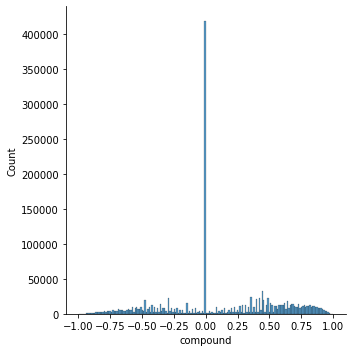

In [21]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

sns.displot(x=new_df['compound'])
plt.show()

## Create new column for Sentiment Type

In [22]:
## create a list of our conditions 
conditions = [
              (new_df['compound'] > 0.05),
              (new_df['compound'] > -0.05) & (new_df['compound'] <= 0.05),
              (new_df['compound'] <= -0.05)
              ]

## create list of values to assign to the conditions

values = ['positive', 'neutral', 'negative']

## create a new column 

new_df['Sentiment'] = np.select(conditions, values)

new_df.head()

Polarity    tweet_id  ... compound Sentiment
0         0  1467810369  ...  -0.0173   neutral
1         0  1467810672  ...  -0.7500  negative
2         0  1467810917  ...   0.4939  positive
3         0  1467811184  ...  -0.2500  negative
4         0  1467811193  ...  -0.4939  negative

[5 rows x 11 columns]

In [23]:
values1 = [4, 2, 0]

new_df['Polarity_new'] = np.select(conditions, values1)
new_df.head()

Polarity    tweet_id  ... Sentiment Polarity_new
0         0  1467810369  ...   neutral            2
1         0  1467810672  ...  negative            0
2         0  1467810917  ...  positive            4
3         0  1467811184  ...  negative            0
4         0  1467811193  ...  negative            0

[5 rows x 12 columns]

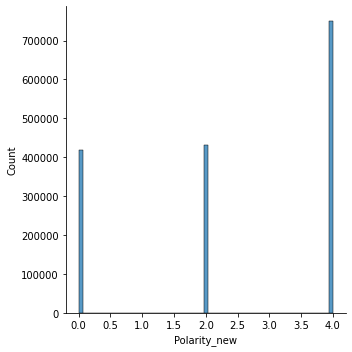

In [24]:
import seaborn as sns
%matplotlib inline

sns.displot(new_df['Polarity_new'])
plt.show()


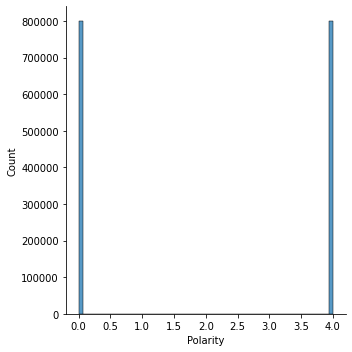

In [25]:
sns.displot(new_df['Polarity'])
plt.show()

In [26]:
## spot check of rows that changed from negative to positive
df_neg_neu = new_df[(new_df['Polarity'] == 0) & (new_df['Polarity_new'] == 4)]
                     
print(df_neg_neu['text'].head(20))

2     @Kenichan I dived many times for the ball. Man...
6                                           Need a hug 
7     @LOLTrish hey  long time no see! Yes.. Rains a...
14    @smarrison i would've been the first, but i di...
15    @iamjazzyfizzle I wish I got to watch it with ...
18    @LettyA ahh ive always wanted to see rent  lov...
19    @FakerPattyPattz Oh dear. Were you drinking ou...
21    one of my friend called me, and asked to meet ...
23               this week is not going as i had hoped 
28    ooooh.... LOL  that leslie.... and ok I won't ...
33    @julieebaby awe i love you too!!!! 1 am here  ...
38    @fleurylis I don't either. Its depressing. I d...
41    He's the reason for the teardrops on my guitar...
43    @JonathanRKnight Awww I soo wish I was there t...
44    Falling asleep. Just heard about that Tracy gi...
45    @Viennah Yay! I'm happy for you with your job!...
46    Just checked my user timeline on my blackberry...
47    Oh man...was ironing @jeancjumbe's fave to

## Create a Word Cloud using the Positive Words 

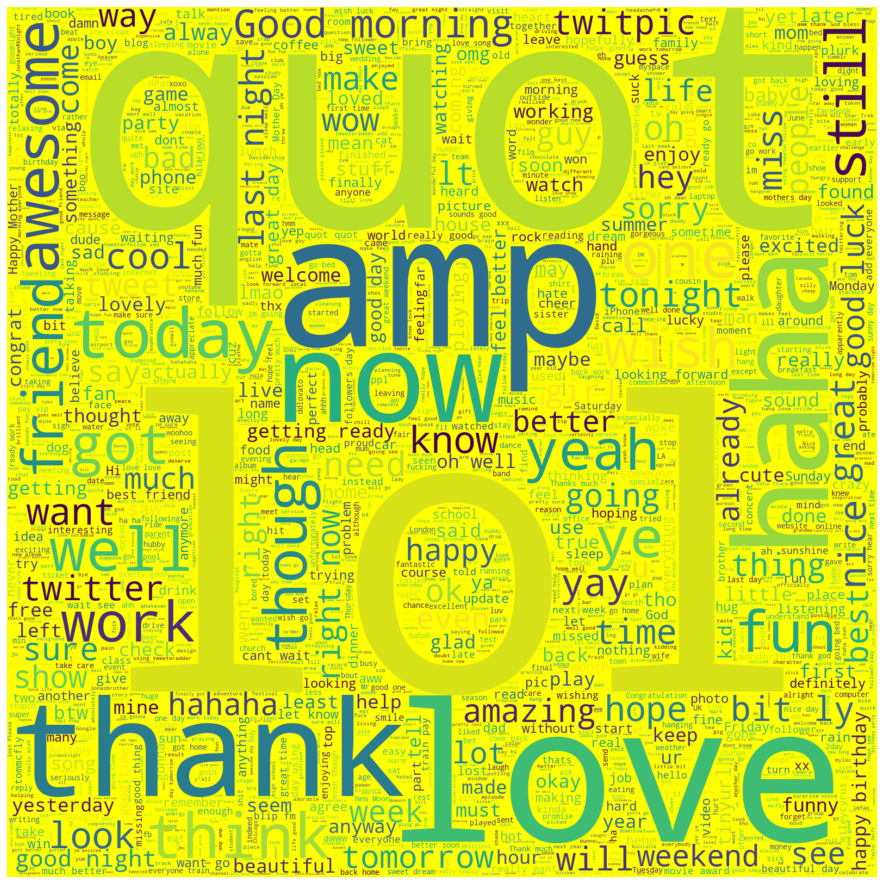

In [27]:
from wordcloud import WordCloud

wc = WordCloud(max_words = 2000, background_color='yellow', width = 1600, height = 1600).generate(''.join(new_df[new_df.Polarity_new == 4].text))

plt.figure(figsize = (16,16), facecolor=None)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Create a Word Cloud using the Neutral words

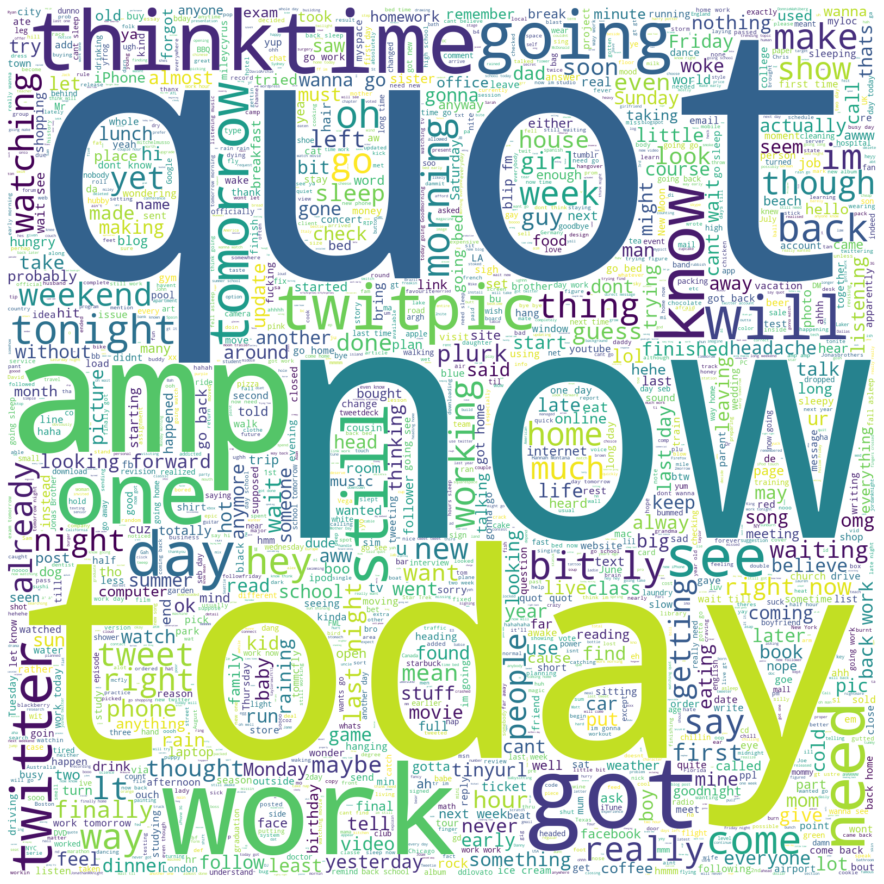

In [28]:
from wordcloud import WordCloud

wc = WordCloud(max_words = 2000, background_color='white', width = 1600, height = 1600).generate(''.join(new_df[new_df.Polarity_new == 2].text))

plt.figure(figsize = (16,16), facecolor=None)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Create a Word Cloud using the Negative Words 

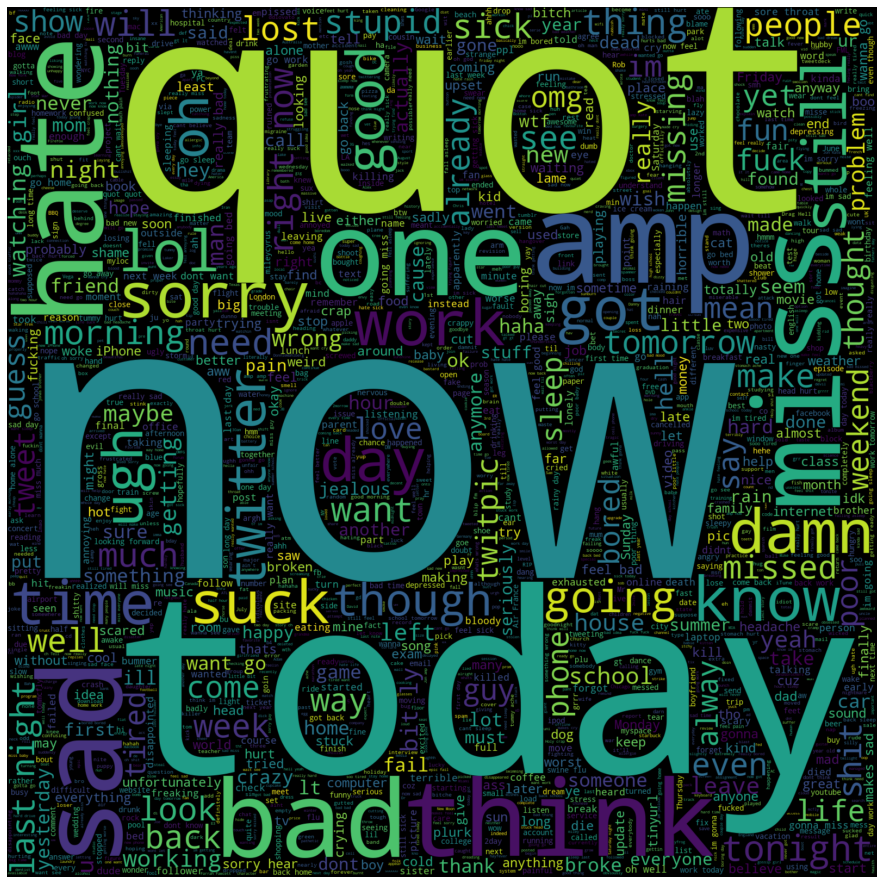

In [29]:
from wordcloud import WordCloud

wc = WordCloud(max_words = 2000, width = 1600, height = 1600).generate(''.join(new_df[new_df.Polarity_new == 0].text))

plt.figure(figsize = (16,16), facecolor=None)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## References

1. [vaderSentiment Python Library](https://github.com/cjhutto/vaderSentiment) accessed 18-October-2020.
2. Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.
3. [Kaggle Sentiment Analysis Dataset](https://www.kaggle.com/kazanova/sentiment140#) accessed 18-October-2020.
4. [Pandas Profiling](https://github.com/pandas-profiling/pandas-profiling) accessed 20-October-2020.


